# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("flight.csv")

In [3]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


#### Tipe Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [5]:
print("Number of rows :", data.shape[0])
print("Number of columns :", data.shape[1])

Number of rows : 62988
Number of columns : 23


**Observasi :**
- Dataset memiliki 23 colums dan 62988 rows data
- Terdapat Tipe data yang belum sesuai pada dataset seperti kolom MEMBER_NO, GENDER, FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE

**Tindak Lanjut :**

Melakukan perubahan tipe data pada kolom:
- MEMBER_NO diubah menjadi Object
- FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIMELAST_FLIGHT_DATE diubah menjadi Timestamp

In [6]:
#Merubah kolom member_no menjadi object

data['MEMBER_NO'] = data['MEMBER_NO'].astype(str)

In [7]:
#Merubah kolom date menjadi timestamp

data['FFP_DATE'] = pd.to_datetime(data['FFP_DATE'])
data['FIRST_FLIGHT_DATE'] = pd.to_datetime(data['FIRST_FLIGHT_DATE'])
data['LOAD_TIME'] = pd.to_datetime(data['LOAD_TIME'])

#### Missing Value

In [8]:
data.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

**Observasi :**
- Hasil data.info() menunjukkan bahwa terdapat beberapa kolom yang memiliki nilai kosong dalam dataset.

**Tindak Lanjut :**
- Data yang kurang lengkap membuat hasil analisis statistik dan pemodelan menjadi kurang baik karena banyak data yang kosong. Sehingga kita perlu melakukan handling untuk mengisi nilai kosong dalam dataset ini.

#### Data Duplicated

In [9]:
data.duplicated().sum()

0

**Observasi :**
*   Hasil data.duplicated() menunjukan bahwa tidak terdapat duplicated pada dataset

# Exploratory Data Analysis (EDA)

In [10]:
# Membagi kolom berdasarkan tipe data
cat = ['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY']
num = ['FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
timestamp = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

**Observasi :**

Membagi kolom berdasarkan tipe data:
- num = kolom yang berisi nilai numeric
- cat = kolom yang berisi nilai categori
- timestamp = kolom yang berisi waktu/date

### Statistik Deskriptif

In [11]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0
MAX_INTERVAL,62988.0,166.033895,123.397180,0.0,79.000000,143.000000,228.000000,728.0


In [12]:
data[cat].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


In [13]:
data[timestamp].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME
count,62988,62988,62988
mean,2010-03-06 23:58:48.672128,2010-09-01 17:59:44.911411968,2014-03-30 23:59:59.999999744
min,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00
25%,2008-04-12 00:00:00,2008-12-14 18:00:00,2014-03-31 00:00:00
50%,2010-10-08 00:00:00,2011-04-23 00:00:00,2014-03-31 00:00:00
75%,2012-03-29 00:00:00,2012-07-26 00:00:00,2014-03-31 00:00:00
max,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00


### Univariate Analysis

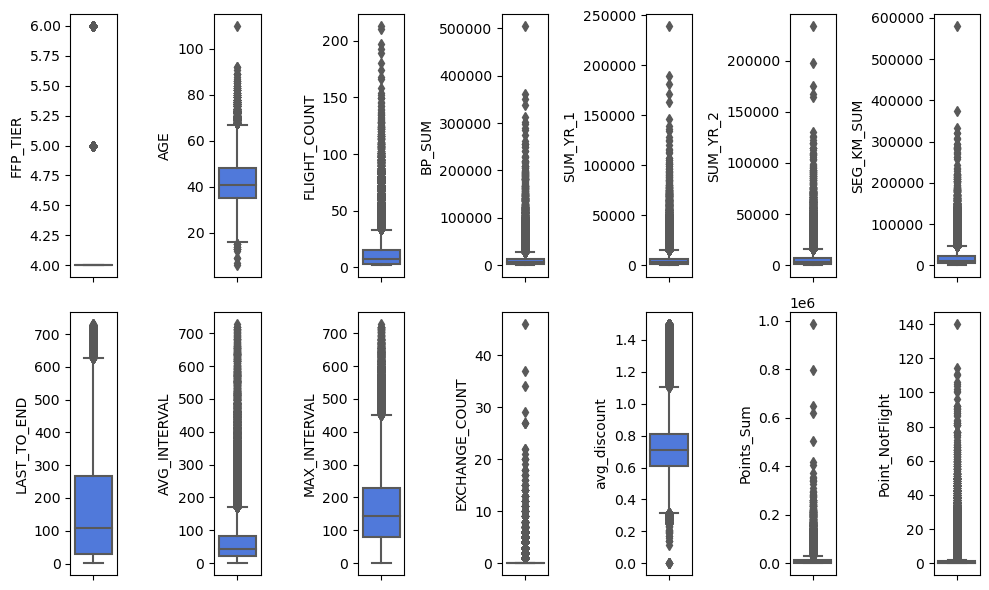

In [14]:
# Distribusi data numerik dengan visualisasi boxplot
plt.figure(figsize=(10, 6))
for i in range(0, len(num)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y=data[num[i]], color='#3970F1', orient='y')
    plt.tight_layout()

plt.show()

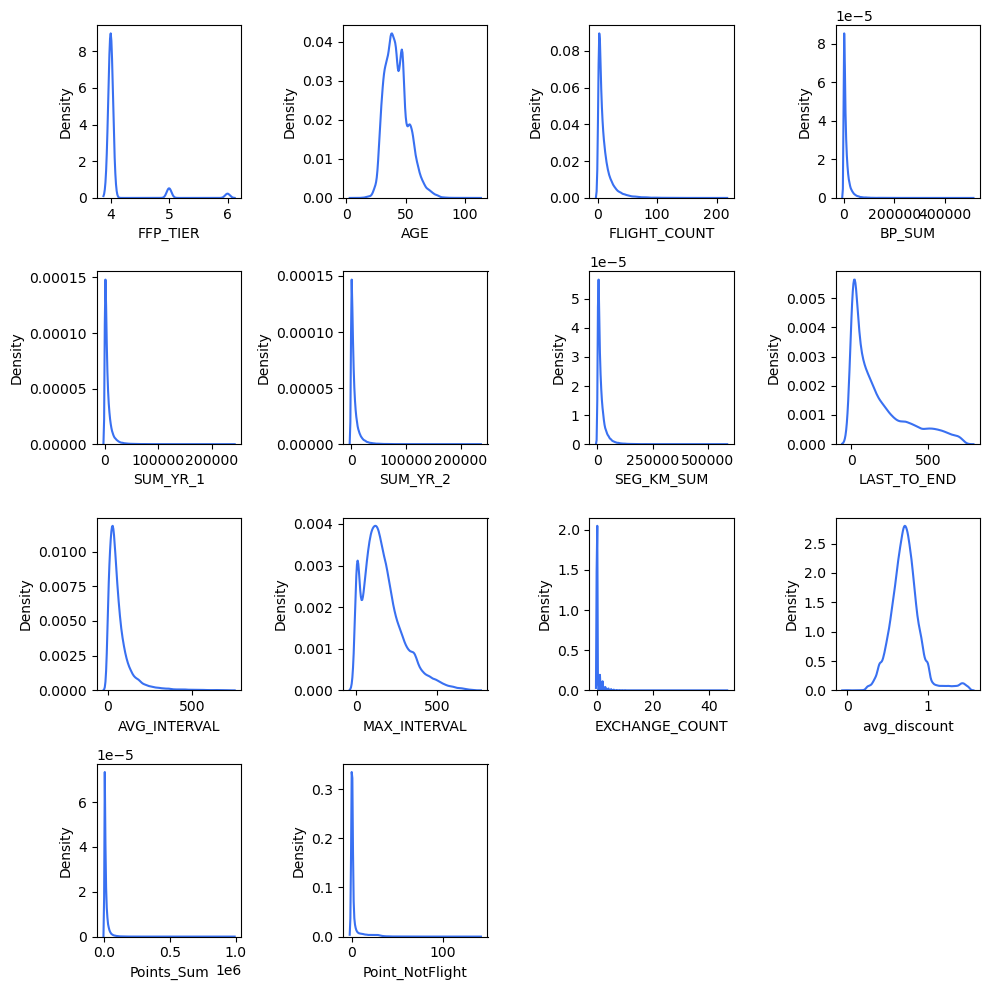

In [15]:
# Distribusi data numerik dengan visualisasi kde
plt.figure(figsize=(10, 10))
for i in range(0, len(num)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=data[num[i]], color='#3970F1')
    plt.xlabel(num[i])
    plt.tight_layout()

**Observasi:**
- Seluruh Kolom ditemukan data outlier yang sebagian besar terletak di bawah batas IQR

**Tindak lanjut**
- Sehingga data yang mengandung outlier akan difilter dengan menggunakan metode IQR.

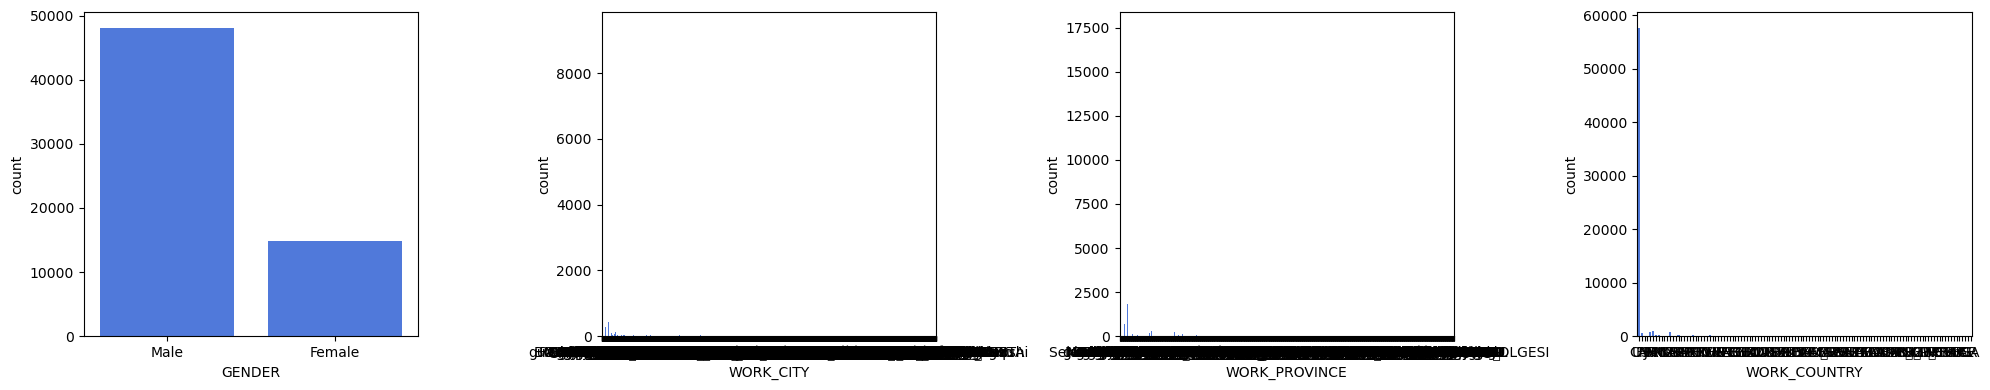

In [16]:
# Distribusi Data Kategorik
plt.figure(figsize=(20, 4))
for i in range(len(cat)):
    plt.subplot(1, len(cat), i+1)
    sns.countplot(x=data[cat[i]], color='#3970F1')
    plt.tight_layout()
plt.show()

**Observasi:**
*   berdasarkan hasil visualisasi untuk kolom kategorik terlihat kurang dapat bisa disimpulkan disebabkan banyaknya UNIQUE pada kolom work_city, work_province, dan work_country

**Tindak Lanjut:**
- Melakukan handling data dengan melakukan cleansing dan encoding
- Jika kolom tersebut tidak digunakan menjadi feature modeling kemungkinan akan di drop datanya


### Multivariate Analysis

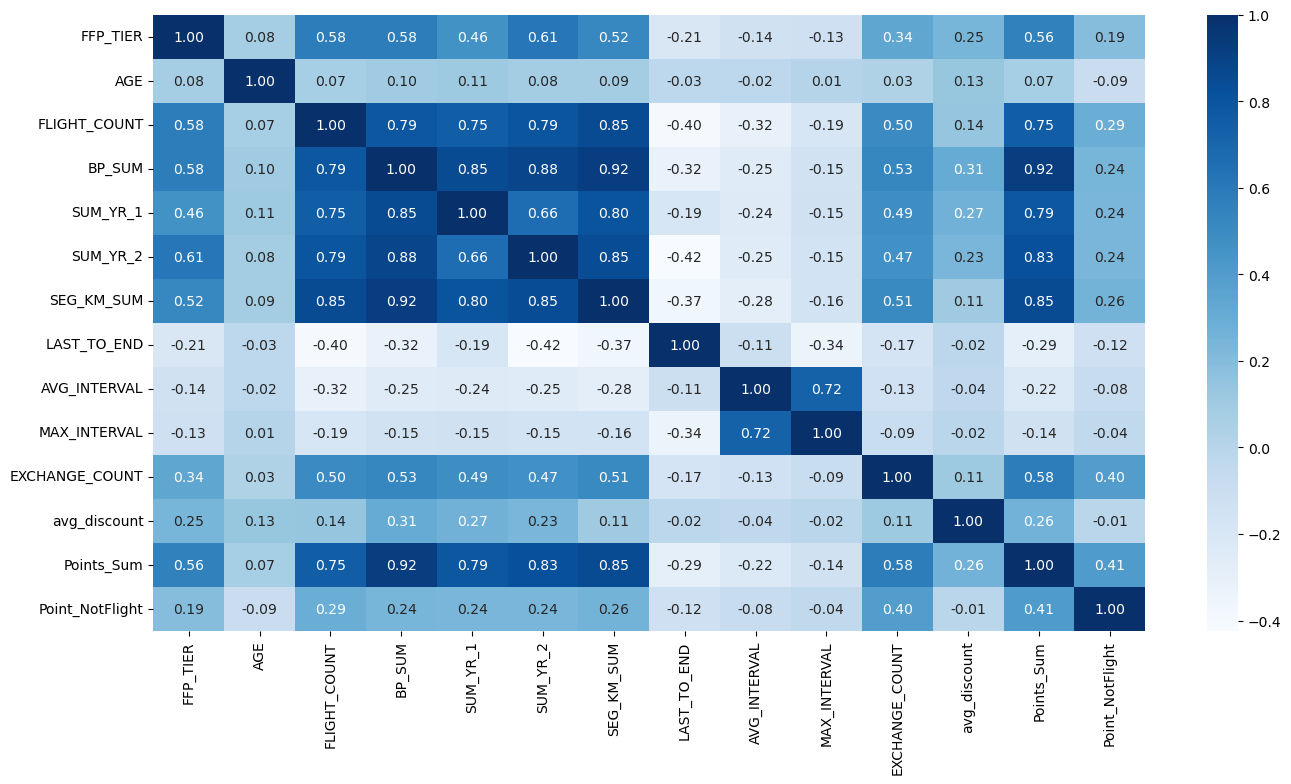

In [17]:
# Data Numerik
plt.figure(figsize=(16, 8))
sns.heatmap(data[num].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

**Observasi:**
- Dapat dilihat bahwa ada korelasi antara beberapa atribut, dengan asumsi semakin dekat nilai korelasi dengan 1 atau -1 maka memiliki baik korelasi positif dan negatif yang cukup kuat.
- BP_SUM berkorelasi kuat dengan FLIGHT_COUNT = 0.79
- Korelasi dari SUM_YR_1 dengan FLIGHT_COUNT = 0.75
- Korelasi dari SUM_YR_1 dengan BP_SUM = 0.85
- Korelasi dari SUM_YR_1 dengan SEG_KM_SUM = 0.80
- Korelasi dari SUM_YR_1 dengan Points_Sum = 0.79
- Korelasi dari SUM_YR_2 dengan FLIGHT_COUNT = 0.80
- Korelasi dari SUM_YR_2 dengan BP_SUM = 0.88
- Korelasi dari SUM_YR_2 dengan SEG_KM_SUM = 0.85
- Korelasi dari SUM_YR_2 dengan Points_Sum = 0.83
- SEG_KM_SUM berkorelasi dengan FLIGHT_COUNT = 0.85
- SEG_KM_SUM berkorelasi dengan BP_SUM = 0.92
- Points_Sum berkorelasi dengan FLIGHT_COUNT = 0.75
- Points_Sum berkorelasi dengan BP_SUM = 0.92
- Points_Sum berkorelasi dengan SEG_KM_SUM = 0.85
- Korelasi dari MAX_INTERVAL dengan AVG_INTERVAL = 0.72
- Korelasi kuat > 0.7 (indikasi)

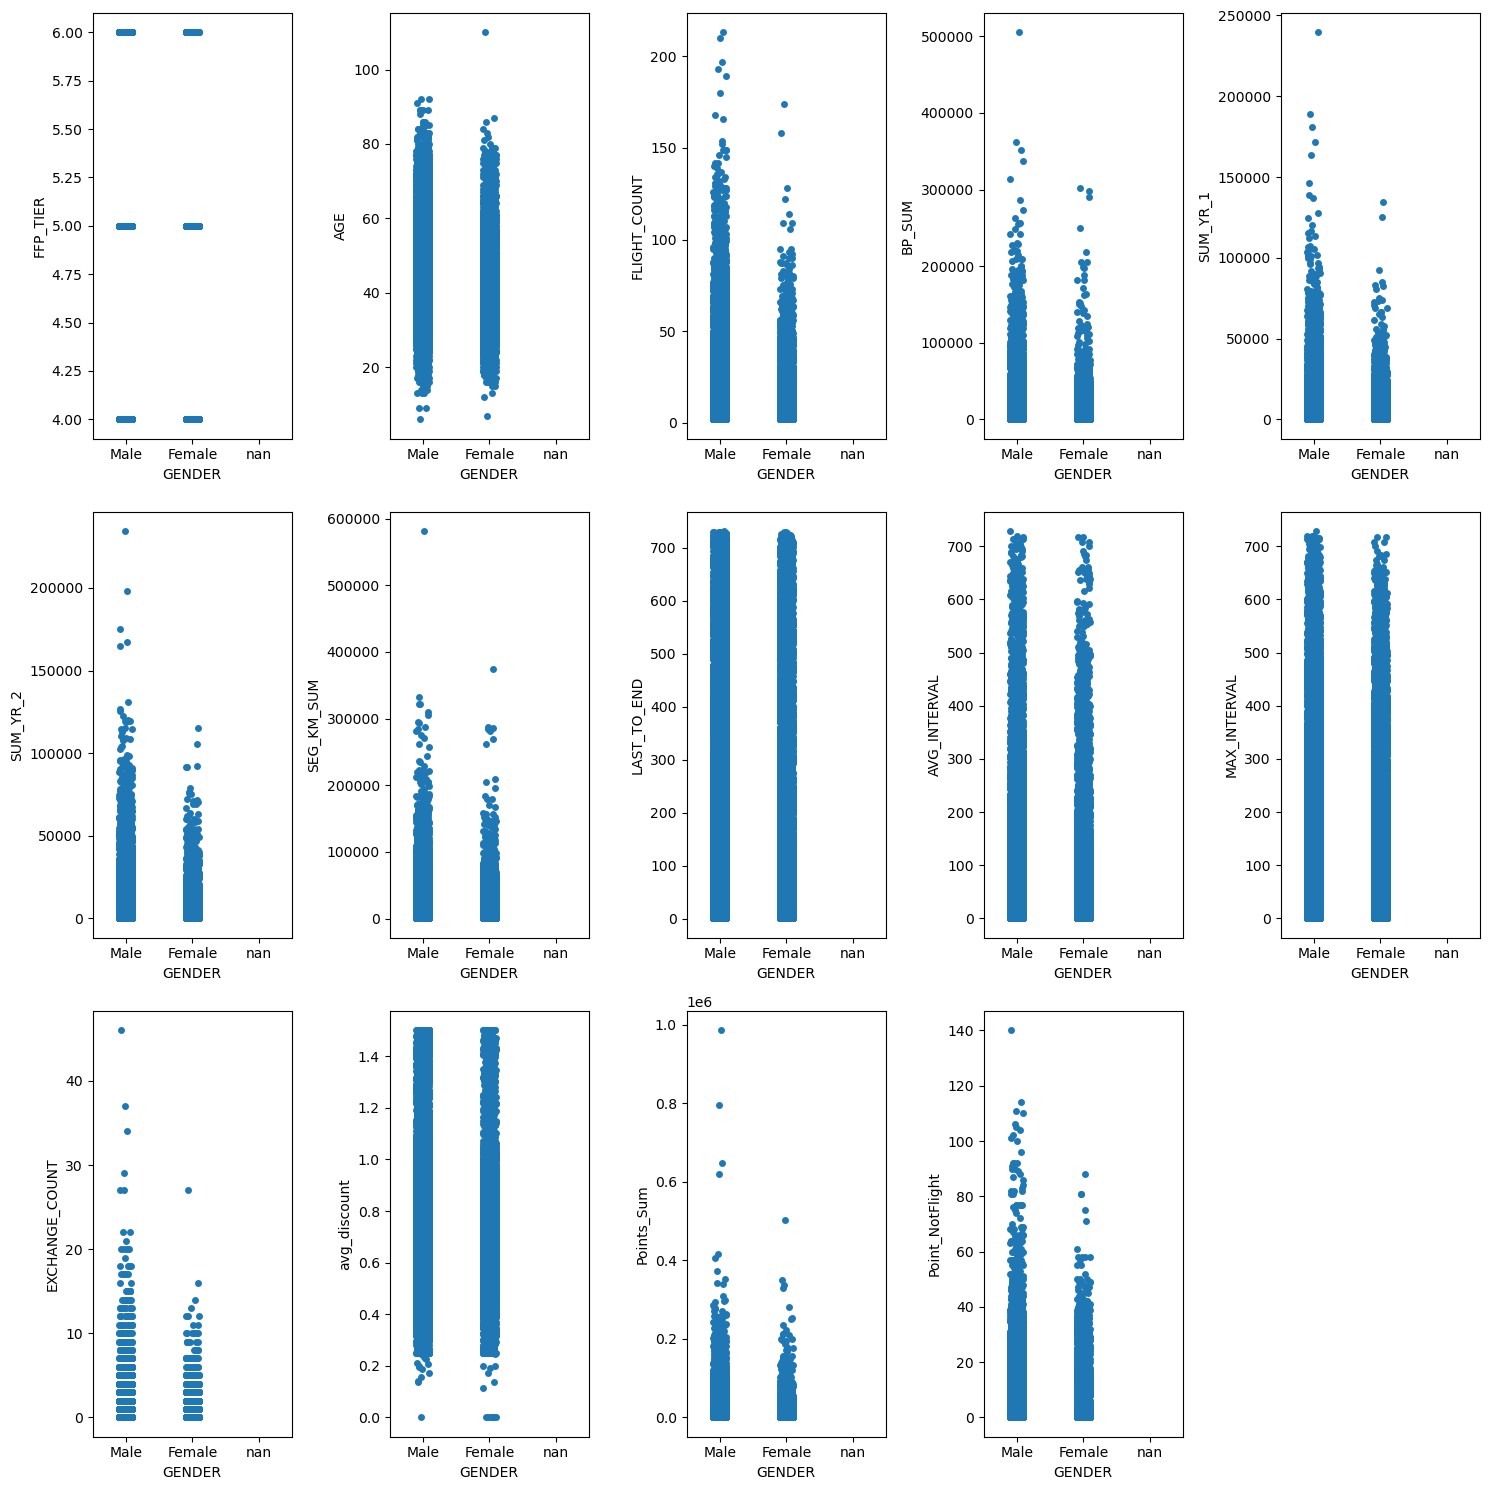

In [18]:
# Data Kategorik
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)):
    ax = fig.add_subplot(3, 5, i+1)
    sns.stripplot(ax=ax, data=data, x='GENDER', y=num[i])
    plt.tight_layout()

# Preprocessing

In [19]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [20]:
# Melakukan encoding kolom Kategori GENDER
data[cat].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


In [21]:
data['GENDER'].fillna(data['GENDER'].mode()[0], inplace=True)

In [22]:
encoder = LabelEncoder()
data["GENDER"] = encoder.fit_transform(data["GENDER"])

data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,1,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,1,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,1,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,1,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,1,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


### Feature Engineering

#### Feature Selection

In [23]:
data_new = data[['FFP_DATE', 'LOAD_TIME', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'LAST_TO_END']]

In [24]:
data_new.head()

,FFP_DATE,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_TO_END
0,2006-11-02,2014-03-31,210,580717,1
1,2007-02-19,2014-03-31,140,293678,7
2,2007-02-01,2014-03-31,135,283712,11
3,2008-08-22,2014-03-31,23,281336,97
4,2009-04-10,2014-03-31,152,309928,5


In [25]:
# Membuat kolom baru yang akan dijadikan fitur untuk dimodelkan
data_new['MEMBER_DURATION'] = ((data_new['LOAD_TIME'] - data_new['FFP_DATE']).dt.days) / 30
data_new['MEMBER_DURATION'] = data_new['MEMBER_DURATION'].astype(int)

In [26]:
data_new.head(5)

,FFP_DATE,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_TO_END,MEMBER_DURATION
0,2006-11-02,2014-03-31,210,580717,1,90
1,2007-02-19,2014-03-31,140,293678,7,86
2,2007-02-01,2014-03-31,135,283712,11,87
3,2008-08-22,2014-03-31,23,281336,97,68
4,2009-04-10,2014-03-31,152,309928,5,60


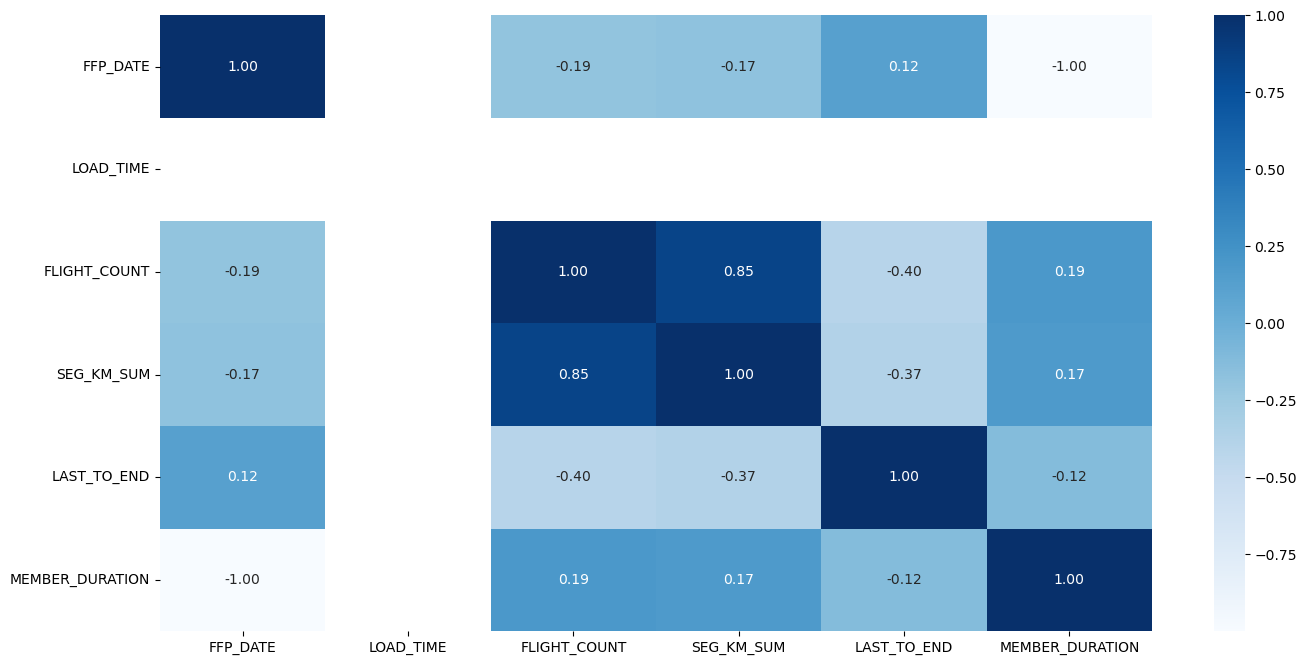

In [27]:
plt.figure(figsize=(16, 8))
sns.heatmap(data_new.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

**Observasi:**
- Menentukan feature baru yang ingin digunakan untuk dimodeling
- Feature yang kami gunakan yang berkaitan dengan kolom yang berkorelasi satu sama lain dan berkorelasi dengan bisnis yang ingin kami uji seperti Customer Values

### Data Cleansing

#### Handle Missing Value

In [28]:
data_new.isna().sum()

FFP_DATE           0
LOAD_TIME          0
FLIGHT_COUNT       0
SEG_KM_SUM         0
LAST_TO_END        0
MEMBER_DURATION    0
dtype: int64

**Observasi:**
*   Tidak ditemukan Missing Value pada feature

#### Handle Data Duplicated

In [29]:
data_new.duplicated().sum()

103

In [30]:
data_new = data_new.drop_duplicates()

data_new.duplicated().sum()

0

**Observasi:**
*   Ditemukan data duplicated pada feature sehingga perlu di lakukan hendling dengan cara menghapus baris-baris yang duplikat dari data_new.

#### Handle Outliers

In [31]:
num = data_new.select_dtypes(include=['int64']).columns.tolist()
num

['FLIGHT_COUNT', 'SEG_KM_SUM', 'LAST_TO_END']

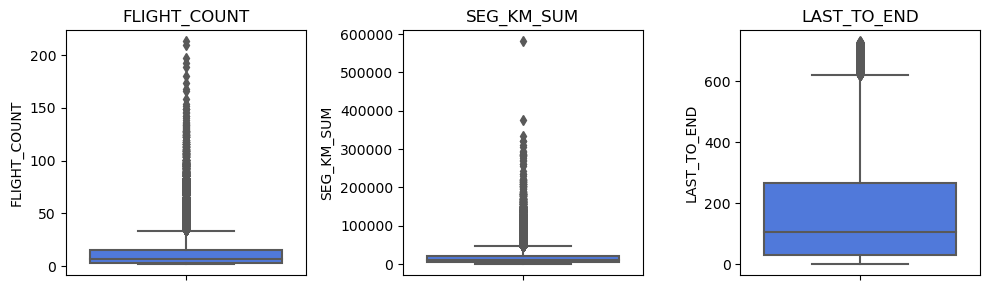

In [32]:
plt.figure(figsize=(10, 3))
for i in range(len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=data_new[num[i]], color='#3970F1', orient='y')
    plt.title(num[i])
    plt.tight_layout()

plt.show()

In [33]:
# Handling outliers dengan IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(data_new)}')
fil_ent = np.array([True] * len(data_new))
for col in ['FLIGHT_COUNT',	'SEG_KM_SUM', 'MEMBER_DURATION','LAST_TO_END']:
    Q1 = data_new[col].quantile(0.25)
    Q3 = data_new[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((data_new[col] >= low_limit) & (data_new[col] <= high_limit)) & fil_ent

    df_fix = data_new[fil_ent].reset_index()

print('Jumlah baris setelah memfilter outlier', len(df_fix))

Jumlah baris sebelum memfilter outlier: 62885
Jumlah baris setelah memfilter outlier 55103


**Observasi:**
*   Terdapat feature yang mengalami outlier sehingga perlu dilakukan handling terhadap feature yang mengalami outlier dengan menggunakan Interquartile Range (IQR)

# Transformation

In [34]:
data_new[num].describe()

,FLIGHT_COUNT,SEG_KM_SUM,LAST_TO_END
count,62885.000000,62885.000000,62885.000000
mean,11.854624,17141.718438,175.627733
std,14.055839,20971.709948,183.416774
min,2.000000,368.000000,1.000000
25%,3.000000,4754.000000,29.000000
50%,7.000000,10018.000000,107.000000
75%,15.000000,21293.000000,266.000000
max,213.000000,580717.000000,731.000000


In [35]:
feature = ['MEMBER_DURATION','LAST_TO_END',	'FLIGHT_COUNT',	'SEG_KM_SUM']
X = data_new[feature].values

In [36]:
X_std = StandardScaler().fit_transform(X)
data_model = pd.DataFrame(data = X_std, columns = feature)

data_model.describe()

,MEMBER_DURATION,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
count,6.288500e+04,6.288500e+04,6.288500e+04,6.288500e+04
mean,8.677695e-17,8.677695e-17,-4.338847e-17,5.785130e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.312201e+00,-9.520892e-01,-7.011109e-01,-7.998323e-01
25%,-8.873001e-01,-7.994301e-01,-6.299655e-01,-5.906918e-01
50%,-2.499485e-01,-3.741658e-01,-3.453840e-01,-3.396850e-01
75%,8.123042e-01,4.927193e-01,2.237790e-01,1.979483e-01
max,2.299458e+00,3.027949e+00,1.431056e+01,2.687333e+01


**Observasi:**
*   Melakukan standarisasi terhadap data menggunakan StandardScaler.
- kolom yang distandarisasi berdasarkan kolom yang ingin di jadikan feature modeling

# Eksport data

In [37]:
data_model.to_csv("data_model.csv", index=False)